In [16]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Preprocess your dataset
X = df[['latitude', 'longitude']]
y = df['operator']

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=3)

# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
knn.fit(X_train, y_train)

# Make predictions on the test data
pred = knn.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, pred)
print("Accuracy score of KNN is:", accuracy)


Accuracy score of KNN is: 0.6564885496183206


In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Read the dataset
df = pd.read_csv("5gdata after cleaning.csv")

# Encode categorical variables
label_encoder = LabelEncoder()
df['operator'] = label_encoder.fit_transform(df['operator'])
df['city_name'] = label_encoder.fit_transform(df['city_name'])
df['status'] = label_encoder.fit_transform(df['status'])

# Split data into features and labels
features = df[['longitude', 'latitude']].values
labels = df['operator'].values

# Ensure labels fall within the expected range
num_classes = len(np.unique(labels))
labels = np.clip(labels, 0, num_classes - 1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Define the GCN model
def create_gcn_model(input_dim):
    inputs = Input(shape=(input_dim,))
    x = Dense(64, activation='relu')(inputs)
    x = Dense(32, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)  # Output dimension is num_classes
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Initialize GCN model
gcn_model = create_gcn_model(X_train.shape[1])

# Compile the model
gcn_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
history = gcn_model.fit(X_train, y_train, batch_size=64, epochs=50, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = gcn_model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_acc}')


Epoch 1/50
30/30 [==============================] - 1s 9ms/step - loss: 1.0067 - accuracy: 0.4939 - val_loss: 0.7834 - val_accuracy: 0.5359
Epoch 2/50
30/30 [==============================] - 0s 3ms/step - loss: 0.7107 - accuracy: 0.5268 - val_loss: 0.6777 - val_accuracy: 0.5694
Epoch 3/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6867 - accuracy: 0.5492 - val_loss: 0.6852 - val_accuracy: 0.5550
Epoch 4/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6905 - accuracy: 0.5545 - val_loss: 0.6795 - val_accuracy: 0.5646
Epoch 5/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6979 - accuracy: 0.5391 - val_loss: 0.6810 - val_accuracy: 0.5550
Epoch 6/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6899 - accuracy: 0.5582 - val_loss: 0.7279 - val_accuracy: 0.4833
Epoch 7/50
30/30 [==============================] - 0s 4ms/step - loss: 0.7156 - accuracy: 0.5407 - val_loss: 0.7015 - val_accuracy: 0.5359
Epoch 8/50
30/30 [==

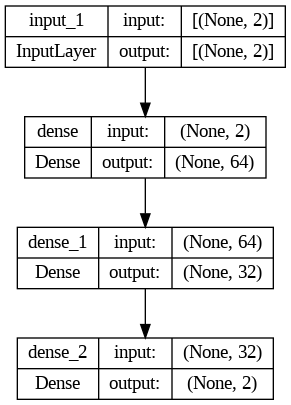

In [3]:
from tensorflow.keras.utils import plot_model

# Plot the model architecture
plot_model(gcn_model, to_file='gcn_model.png', show_shapes=True, show_layer_names=True)


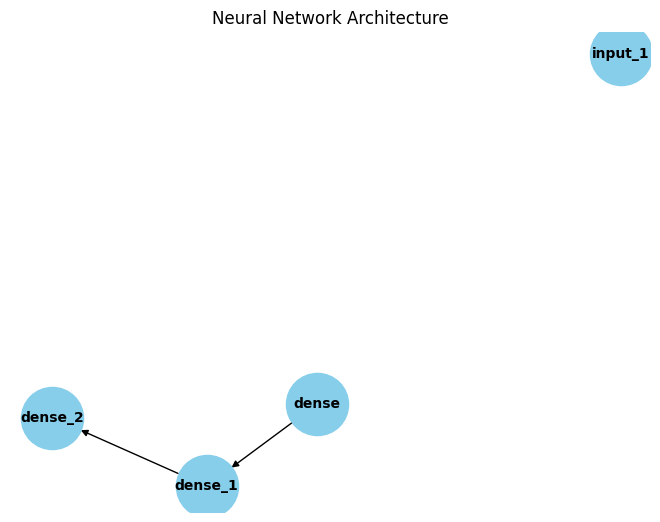

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_network(model):
    G = nx.DiGraph()

    # Add nodes for each layer
    for layer in model.layers:
        G.add_node(layer.name)

    # Add edges connecting layers
    for i, layer in enumerate(model.layers):
        if i > 0:
            prev_layer = model.layers[i - 1]
            for node1 in prev_layer.output_shape[1:]:
                for node2 in layer.input_shape[1:]:
                    G.add_edge(prev_layer.name, layer.name)

    # Plot the graph
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_weight='bold', arrows=True)
    plt.title("Neural Network Architecture")
    plt.show()

# Call the function to visualize the network
visualize_network(gcn_model)
